# Python Programming Exercises

### Exercise 1
Write a program to solve a classic puzzle: There are 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? Hint: Use for loop to iterate all possible solutions

In [1]:
# Number of chickens: c
# Number of rabbits: r

# c + r = 35
# 2*c + 4*r = 94

for c in range(36):
    r = 35 - c
    if 2*c + 4*r == 94:
        print(f"There are {c} chickens and {r} rabbits.")

There are 23 chickens and 12 rabbits.


### Exercise 2
In this exercise, the task is to read a set of temperature data (the monthly high temperatures at Heathrow Airport from Jan 1948 through Dec 2016) from a file and then find some basic information: the highest and lowest temperatures, the mean (average) temperature, and the median temperature (the temperature in the middle if all the temperatures are sorted). The temperature data is in the file “data/Heathrow.txt”.

In [10]:
def median(temperature):
    t = sorted(temperature)
    n = len(temperature)
    if n%2 == 1:
        return t[n//2]
    else:
        return (t[n//2 - 1] + t[n//2]) / 2
    
def mean(temperature):
    return sum(temperature)/len(temperature)

with open("data/Heathrow.txt", "r") as f:
    raw_data = f.readlines()
    data = []
    for d in raw_data:
        data.append(float(d.strip()))
    
    print(f"Lowest temperature: {min(data)}")
    print(f"Highest temperature: {max(data)}")
    print(F"Mean temperature: {mean(data):.2f}")
    print(f"Median temperature: {median(data)}")


Lowest temperature: 0.8
Highest temperature: 28.2
Mean temperature: 14.85
Median temperature: 14.7


### Exercise 3
For the problem in Exercise 1, use NumPy by applying linear algebra to find the solution.

In [3]:
# Number of chickens: c
# Number of rabbits: r

# c + r = 35
# 2c + 4r = 94

import numpy as np

coeffs = np.array([[1, 1], [2, 4]])
depvars = np.array([35, 94])

c, r = np.linalg.solve(coeffs, depvars)

print(f"There are {c:.0f} chickens and {r:.0f} rabbits.")


There are 23 chickens and 12 rabbits.


### Exercise 4
Solve Exercise 2 by using NumPy.

In [5]:
# Hints: Use np.mean() and np.median()

import numpy as np

data = np.loadtxt("data/Heathrow.txt")
print(f"Lowest temperature: {min(data)}")
print(f"Highest temperature: {max(data)}")
print(F"Mean temperature: {np.mean(data):.2f}")
print(f"Median temperature: {np.median(data)}")

Lowest temperature: 0.8
Highest temperature: 28.2
Mean temperature: 14.85
Median temperature: 14.7


### Exercise 5
Solve Exercise 2 by using Pandas. In addition, find out the hottest month between 1948 and 2016. Plot the mean temperature for each month.

             Temp
min      0.800000
max     28.200000
mean    14.848309
median  14.700000
The hottest year and month: 2006-07
         Temp
1    7.559420
2    8.007246
3   10.895652
4   13.908696
5   17.530435
6   20.814493
7   22.882609
8   22.426087
9   19.633333
10  15.452174
11  10.772464
12   8.297101


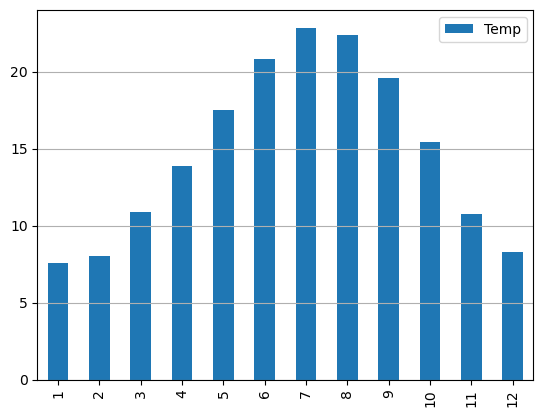

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# read data from csv file into a Pandas dataframe
df = pd.read_csv("data/Heathrow.txt", header=None, names=('Temp',))
print(df.aggregate(('min', 'max', 'mean', 'median')))

# Set the index to a range of date, increment by month
df.index = pd.period_range(start=1948, periods=len(df), freq='M')

# Sort the data in ascending order
df.sort_values(by='Temp', inplace=True)
print(f"The hottest year and month: {df.index[-1]}")

# Export datafram to Excel
df.to_excel('temperature_data.xlsx', index_label='Date')

# Group the temperatures by months (e.g. all tempertures for January will be grouped together)
groups = df.groupby(df.index.month)
print(groups.mean())

# Plot the mean temperature for each month
groups.mean().plot.bar()
plt.grid(axis='y')
plt.show()

### Exercise 6
Plot two cycles of a sinusoidal voltage waveform with an amplitude of 2 and frequency of 50Hz and a DC offset of 5V. Calculate the average voltage and root mean square (RMS) voltage.

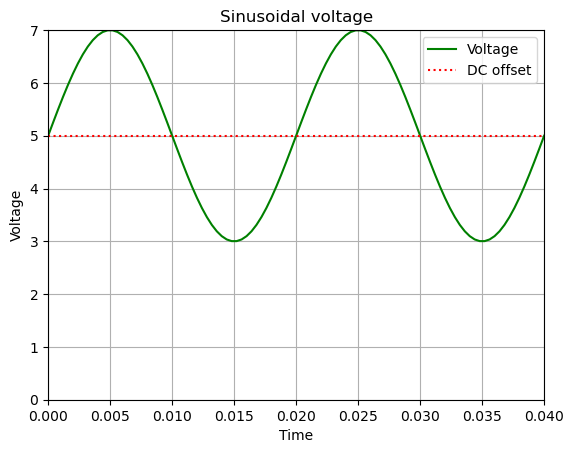

Average voltage: 5.000, RMS voltage: 5.194


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Equation of the sinusiodal voltage
# v(t) = Vp*sin(2*pi*f*t) + Vdc
# Vp = 2
# f = 50
# Vdc = 5

f = 50
t = np.linspace(0, 0.04, 101)  # For 2 cycles (period = 1/50 = 0.02s)
v = 2 * np.sin(2 * np.pi * f * t) + 5

plt.plot(t, v, 'g', label='Voltage')
plt.axhline(5, color='red', ls=':', label='DC offset')
plt.xlim([0, 0.04])
plt.ylim([0, 7])
plt.grid('both')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.title('Sinusoidal voltage')
plt.show()

# Average voltage
V_average = np.mean(v)

# RMS voltage
V_rms = np.sqrt(np.square(v).mean())

print(f"Average voltage: {V_average:.3f}, RMS voltage: {V_rms:.3f}")

### Exercise 7
Below are the data points of a sawtooth current:\
    f2 = 50\
    t2 = np.linspace(0, 0.04, 41)\
    i = 2 * (f2 * t2 - np.floor(0.5 + f2 * t2)) + 1

Plot the current and the power if the voltage is as shown in Exercise 6.

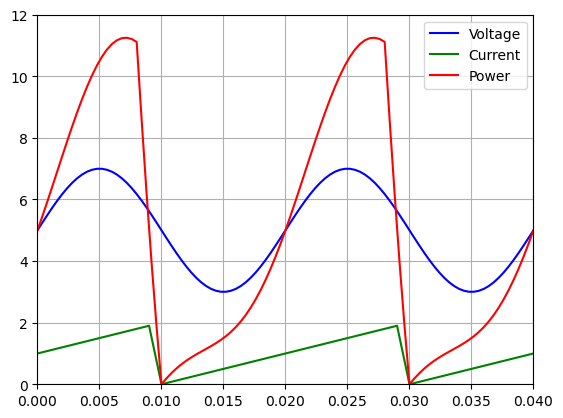

In [50]:
import pandas as pd
f2 = 50
t2 = np.linspace(0, 0.04, 41)
i = 2 * (f2 * t2 - np.floor(0.5 + f2 * t2)) + 1

# Resample the current so that it has the same number of data points as the voltage
s1 = pd.Series(i)
s1.index = pd.to_timedelta(t2, unit='s')
s2 = s1.resample('0.4ms').interpolate(method='linear')
i2 = s2.values  # convert Panda series to numpy array

# Multiply voltage and current to get the power
p = v * i2

plt.plot(t, v, 'b', label='Voltage')
plt.plot(t2, i, 'g', label='Current')
plt.plot(t, p, 'r', label='Power')
plt.legend(loc='best')
plt.xlim([0, 0.04])
plt.ylim([0, 12])
plt.grid('both')
plt.show()


### Exercise 8
A voltage waveform has been downloaded from an oscilloscope by using PyVISA. The waveform is stored in the CSV file format and the file can be accessed as 'data/waveform_data.csv'. Load and plot the waveform from the CSV file.

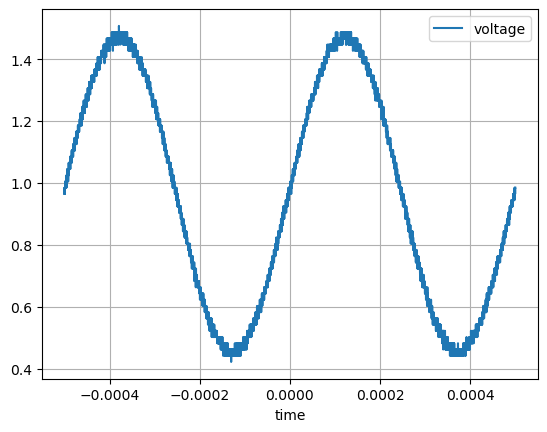

In [54]:
# Hint: use df.set_index('time', inplace=True) to set the 'time' column as the index

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/waveform_data.csv", header=None, names=('time', 'voltage'))
df.set_index('time', inplace=True)

df.plot()
plt.grid("both")
plt.legend(loc="best")
plt.show()
